In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.classify import NaiveBayesClassifier
!pip install wordcloud
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection, naive_bayes, svm
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 
import re
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
import warnings
!pip install textblob

from textblob import TextBlob
import pandas as pd

!pip install spello

from spello.model import SpellCorrectionModel


sp = SpellCorrectionModel(language = "en")

from sklearn.metrics import confusion_matrix,accuracy_score
warnings.filterwarnings("ignore")


Dataframe shape: (741, 2)
0       687
1       197
2       424
3       221
4       184
       ... 
736    5752
737    5847
738    5371
739    3040
740    3591
Name: Textlength, Length: 741, dtype: int64


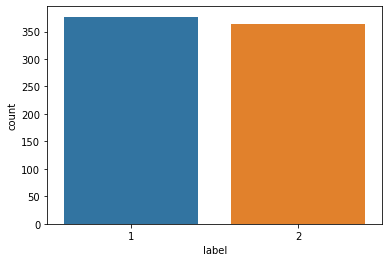

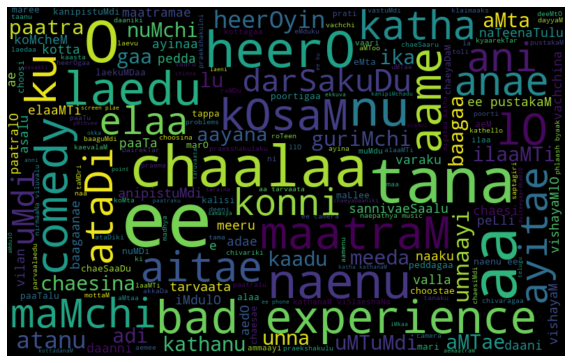

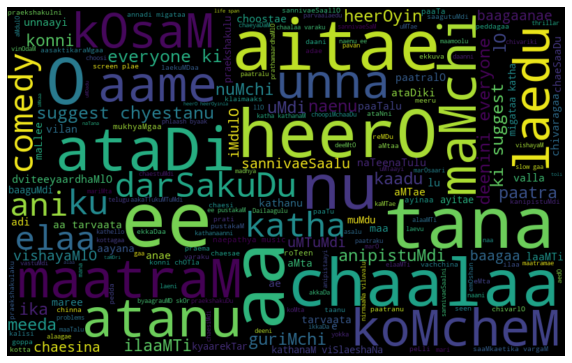

Spello training started..
Context model training started ...
Symspell training started ...
Phoneme training started ...
Spello training completed successfully ...
34
34
42
42
32
32
82
82
30
30
80
80
76
76
78
78
16
16
62
62
68
68
70
70
20
20
74
74
36
36
82
82
14
14
74
74
64
64
14
14
80
80
64
64
52
52
50
50
72
72
182
182
88
88
42
42
40
40
132
132
70
70
136
136
72
72
96
96
134
134
178
178
90
90
76
76
70
70
70
70
64
64
68
68
40
40
714
714
702
702
658
658
700
700
470
470
656
656
532
532
620
620
300
300
598
598
606
606
660
660
620
620
800
800
592
592
344
344
624
624
1180
1180
720
720
642
642
876
876
648
648
500
500
388
388
708
708
816
816
894
894
764
764
708
708
760
760
872
872
632
632
756
756
596
596
620
620
590
590
630
630
678
678
822
822
594
594
574
574
778
778
678
678
758
758
354
354
660
660
542
542
866
866
622
622
324
324
432
432
708
708
728
728
676
676
890
890
646
646
268
268
406
406
684
684
834
834
706
706
586
586
412
412
528
528
304
304
526
526
578
578
666
666
814
814
986
986
532
532

In [2]:
data = pd.read_csv("dsm.csv")
print("Dataframe shape:", data.shape)
data.head()
data.columns[data.isnull().any()]
data.isnull().sum()
data.isnull().any(axis=1)
data.index[data.isnull().any(axis=1)]

data['label'].unique()
sns.countplot(data.label)



data['Textlength'] = data['Text'].str.len()
print(data['Textlength'])

def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=5, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

subset=data[data.label==1]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

subset=data[data.label==2]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

with open("filetest.txt","r") as file:
    data2 = file.readlines()
    
data2 = [i.strip() for i in data]
sp.train(data2)
def process_text1(text):
   
    stop_words = set(stopwords.words('english','telugu')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    thisdict = {}
    thisdict =sp.spell_correct(text)
    sp.spell_correct(text)
    x=[]
    x=thisdict["spell_corrected_text"]    
    return x

data['Text_parsed'] = data['Text'].apply(process_text1)



from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['label']= label_encoder.fit_transform(data['label'])



In [3]:
import csv

from googletrans import Translator

import re,string, unicodedata

from nltk.corpus import stopwords

from nltk.tokenize import sent_tokenize, word_tokenize

from num2words import num2words

from nltk import word_tokenize, sent_tokenize

from nltk.corpus import stopwords

from nltk.stem import LancasterStemmer, WordNetLemmatizer

from indic_transliteration import sanscript 

from indic_transliteration.sanscript import transliterate 

import re


def process_text2(ab):
    stop_words = set(stopwords.words('english'))

    pattern=r'(?i)\b((?:[a-z][\w-]+:(?:/{1,3}|[a-z0-9%])|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))';

    match = re.findall(pattern, ab)

    stop_words=['i','ar','wer','me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 
                
                'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves',
                
                'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 
                
                'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
                
                'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having',
                
                'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while',
                
                'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
                
                'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
                
                'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
                
                'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very',
                
                's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm',
                
                'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn',
                
                "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma',
                
                'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',
                
                "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

    for m in match:
    
        url = m[0]
 
        ab = ab.replace(url,' ')

    punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''

    for i in ab:  
    
        if i in punc:  
        
            ab= ab.replace(i," ")

    st1=[]    
    
#print(strl)      

    st=word_tokenize(ab)

    strln=[]

    for item in st:
    
        a=item.lower()
    
        strln.append(a)

    stemmer = LancasterStemmer()

    stems = []

    for word in strln:

        stem = stemmer.stem(word)
    
        stems.append(stem)
    
#print(stems)

    lemmatizer = WordNetLemmatizer()


    lemmas = []

    for word in stems:
    
        lemma = lemmatizer.lemmatize(word, pos='v')
        
        lemmas.append(lemma)

#print(lemmas)

    final = []

    with open('engmix.csv', "r+", encoding="utf-8") as csv_file:
        
        content = csv_file.read()

    with open('eng1.csv', "w+", encoding="utf-8") as csv_file:
 
        csv_file.write(content.replace('"', ''))


    with open('eng1.csv', 'r') as filehandle:
    
    
        for line in filehandle:

            currentPlace = line[:-1]
        
            final.append(currentPlace)


    count = 0


    g="-eng"

    t="-te"

    sai=[]

    sai1=[]

    for w in strln:
    
        if w not in stop_words:
         
            st1.append(w)
        
    sai2=[]     

#print(st1)
        
    for s in st1:

        if  s.isdigit()!=1:
            
            sai2.append(s)
        
#print(sai2)

    lookp_dict = {"2f4u":"too fast for you","4yeo fyeo":"for your eyes only",
                  
                  "aamof":"as a matter of fact","ack":"acknowledgment","afaik":"as far as i know",
                  
                  "afair":"as far as i remember recall","afk":"away from keyboard","aka":"also known as",
                  
                  "b2k btk":"back to keyboard","btt":"back to topic","btw":"by the way","bc":"because",
                  
                  "cp":"copy and paste","cu":"see you","cys":"check your settings","diy":"do it yourself",
                  
                  "eobd":"end of business day","eod":"end of discussion","eom":"end of message",
                  
                  "eot":"end of thread text  transmission","faq":"frequently asked questions",
                  
                  "fack":"full acknowledge","fka":"formerly known as","fwiw":"for what it's worth",
                  
                  "fyi jfyi":"(just) for your information","ftw":"fuck the world for the win","hf":"have fun",
                  
                  "hth":"hope this helps","idk":"i don't know","iirc":"if i recall  remember correctly",
                  
                  "imho":"in my humble opinion","imo":"in my opinion","imnsho":"in my not so humble  honest opinion",
                  
                  "iow":"in other words","itt":"in this thread","mmw":"mark my words","na":"not available applicable",
                  
                  "nan":"not a number","nntr":"no need to reply","noob n00b":"newbie","noyb":"none of your business",
                  
                  "nrn":"no reply necessary","omg":"oh my god","op":"original poster original post","ot":"off topic",
                  
                  "otoh":"on the other hand","pebkac":"problem exists between keyboard and chair","pov":"point of view",
                  
                  "rotfl":"rolling on the floor laughing","rtfm":"read the fine manual","scnr":"sorry could not resist",
                  
                  "sflr":"sorry for late reply","spoc":"single point of contact","tba":"to be announced",
                  
                  "tbc":"to be continued to be confirmed","tia":"thanks in advance","tgif":"thanks god its friday",
                  
                  "thx tnx":"thanks","tq":"thank you","tyvm":"thank you very much","tyt":"take your time",
                  
                  "ttyl":"talk to you later","w00t":"whoomp","wfm":"works for me","wrt":"with regard to",
                  
                  "wth":"what the hell  what the heck","wtf":"what the fuck","ymmd":"you made my day",
                  
                  "ymmv":"your mileage may vary","yam":"yet another meeting","icymi":"in case you missed it"}
  
    res = [] 

    for wrd in sai2: 
       
        res.append(lookp_dict.get(wrd, wrd)) 
   
    sai9=list(res)

#print(sai9)

    sai3=[]

    sai8=" "

    sai7=sai8.join(sai9)

#print(sai7)

    sai6=list(sai7.split(" "))

    

    ksbs=[]

    file_CSV1 = open('telugu script in english.txt','r',encoding="utf-8")

    data_CSV1 = csv.reader(file_CSV1)

    telugu1= list(data_CSV1)

    telugu2 = [ item for elem in telugu1 for item in elem]

    file1 = open('telugu script in english1.txt','r',encoding="utf-8")

    data1 = csv.reader(file1)

    tel1= list(data1)

    tel2 = [ item for elem in telugu1 for item in elem]

    for item in telugu2:

        a=transliterate(item, sanscript.ITRANS, sanscript.TELUGU)
    
        ksbs.append(a)

    q="-un"

    dict={}

    krishna=[]
    

    
    

    for l in sai6: 
    
        if l in final:
                
            c=l+g
            
            sai3.append(c)
        
            krishna.append(l)
        
       
    
        elif l not in final:
        
            for item in telugu2:
            
                ce=item
            
                be=item.lower()
            
                if be==l:
            
                    l=ce
                    
                    d=l+t
                    
                    sai3.append(d)
                    
                    break
            else:
                    te=l+q
                    
                    sai3.append(te)
            
    

            
    

    
    
    rd= " "

    sentim=rd.join(sai6)
    
#print(dict)

#print(krishna)

    sai4=[]

    sl=[]
    
    for kt in sai6:
    
        if kt not in stop_words:
         
            sl.append(kt)

    for l in sl: 
    
        if l in final:
                
       
            
             sai4.append(l)
            
             dict[l]=g
        
        elif l not in final:
        
            for item in telugu2:
            
                de=item
            
                be=item.lower()
            
                if be==l:
                
                     l=de
                    
                     z=transliterate(l, sanscript.ITRANS, sanscript.TELUGU)
                 
                     sai4.append(z)
                  
                     dict[z]=t
                 
                     break
            else:
            
              sai4.append(l)
         
              dict[l]=q

#print(sai4)

    hr= " "

    transliteration=hr.join(sai4)
    
    return transliteration

data['Text_parsedd'] = data['Text_parsed'].apply(process_text2)

[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.2043326 0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]
(149, 1300)


{'సమయ': 1290, 'తర': 1086, 'ఓర': 956, 'వచ': 1260, 'ఓక': 948, 'అమ': 842, 'తప': 1082, 'గత': 999, 'ఏన': 921, 'kathaa': 314, 'rachayitagaa': 574, 'పన': 1145, 'చఏస': 1022, 'అనఏ': 831, 'రచయ': 1204, 'ee': 197, 'sinimauto': 646, 'darsakudigaa': 179, 'పర': 1150, 'చయ': 1039, 'ఏప': 925, 'శన': 1277, 'meenan': 401, 'terakekkina': 716, 'అన': 824, 'kanekt': 304, 'లఏద': 1235, 'chooddaam': 146, 'లఏక': 1231, 'cheppaalamtae': 130, 'దర': 1105, 'roteen': 588, 'gala': 246, 'అతడ': 814, 'మధ': 1169, 'లవ': 1251, 'storee': 672, 'మర': 1176, 'రవ': 1226, 'ఏగ': 915, 'అయ': 843, 'చఏయ': 1016, 'లన': 1247, 'ఏల': 938, 'రమఏ': 1218, 'vislaeshana': 794, 'దట': 1100, 'కథ': 977, 'kaansept': 295, 'తగ': 1071, 'చఏయడ': 1019, 'hit': 272, 'భవ': 1163, 'కన': 986, 'నఏ': 1112, 'ordinarymgaa': 454, 'ae': 44, 'సగట': 1287, 'కల': 991, 'గఏ': 998, 'feeling': 238, 'anipimchimdi': 65, 'Sఅక': 10, 'amtakumimchi': 60, 'టల': 1054, 'nadipimchadam': 424, 'అనఏద': 836, 'రణ': 1206, 'యల': 1191, 'అల': 851, 'chaalaanae': 113, 'chivarlo': 142, 'anipimchinaa':

Accuracy:  0.825503355704698
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        86
           1       0.80      0.78      0.79        63

    accuracy                           0.83       149
   macro avg       0.82      0.82      0.82       149
weighted avg       0.82      0.83      0.83       149



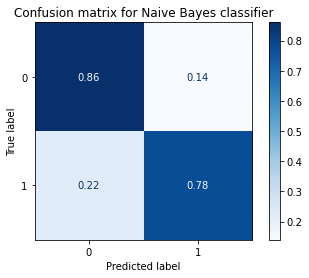

[[74 12]
 [14 49]] 82.5503355704698


In [4]:
data.to_csv('allreviews1.csv',index=False,header=False,)

X_train, X_test, y_train, y_test = train_test_split(data['Text_parsedd'], 
                                                    data['label'], 
                                                    test_size=0.2, 
                                                    random_state=5)
X_train.shape , y_test.shape
y_test.head()

ngram_range = (1,3)
min_df = 10
max_df = 1.
max_features = 1300

import pickle
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
print(tfidf.vocabulary_)

Naive = naive_bayes.MultinomialNB()
Naive.fit(features_train, y_train)
predictions_NB = Naive.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, predictions_NB))
print(classification_report(labels_test, predictions_NB))
matrix = plot_confusion_matrix(Naive, features_test, labels_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for Naive Bayes classifier')
plt.show(matrix)
plt.show()
cm = confusion_matrix(labels_test,predictions_NB)
score = accuracy_score(labels_test,predictions_NB)
print(cm,score*100)





[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.2043326 0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]
(149, 1300)
{'సమయ': 1290, 'తర': 1086, 'ఓర': 956, 'వచ': 1260, 'ఓక': 948, 'అమ': 842, 'తప': 1082, 'గత': 999, 'ఏన': 921, 'kathaa': 314, 'rachayitagaa': 574, 'పన': 1145, 'చఏస': 1022, 'అనఏ': 831, 'రచయ': 1204, 'ee': 197, 'sinimauto': 646, 'darsakudigaa': 179, 'పర': 1150, 'చయ': 1039, 'ఏప': 925, 'శన': 1277, 'meenan': 401, 'terakekkina': 716, 'అన': 824, 'kanekt': 304, 'లఏద': 1235, 'chooddaam': 146, 'లఏక': 1231, 'cheppaalamtae': 130, 'దర': 1105, 'roteen': 588, 'gala': 246, 'అతడ': 814, 'మధ': 1169, 'లవ': 1251, 'storee': 672, 'మర': 1176, 'రవ': 1226, 'ఏగ': 915, 'అయ': 843, 'చఏయ': 1016, 'లన': 1247, 'ఏల

SVM Accuracy Score ->  84.56375838926175
[[78  8]
 [15 48]] 84.56375838926175


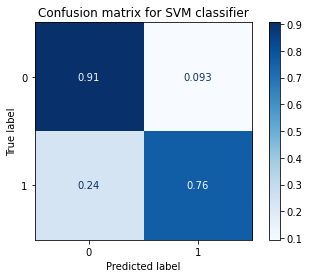

Accuracy:  0.8456375838926175
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        86
           1       0.86      0.76      0.81        63

    accuracy                           0.85       149
   macro avg       0.85      0.83      0.84       149
weighted avg       0.85      0.85      0.84       149



In [5]:
ngram_range = (1,3)
min_df = 10
max_df = 1.
max_features = 1300

import pickle
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
print(tfidf.vocabulary_)

SVM = svm.SVC(C=1.0, kernel='linear', degree=4, gamma='auto')
SVM.fit(features_train, y_train)
predictions_SVM = SVM.predict(features_test)
saved_model= pickle.dumps(SVM) 
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, labels_test)*100)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(labels_test, predictions_SVM)
score = accuracy_score(labels_test,predictions_SVM)
print(cm,score*100)

predictions = SVM.predict(features_test)
matrix = plot_confusion_matrix(SVM, features_test, labels_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for SVM classifier')
plt.show(matrix)
plt.show()
print('Accuracy: ', accuracy_score(labels_test,predictions_SVM))
print(classification_report(labels_test,predictions_SVM))



In [ ]:
svm_from_pickle = pickle.loads(saved_model) 

def new_review(new_review):
    new_review = new_review
    
    new_corpus = [new_review]
    new_X_test = tfidf.transform(new_corpus).toarray()
    print(new_X_test.shape)
    new_y_pred = svm_from_pickle.predict(new_X_test)
    return new_y_pred

new_review = new_review(str(input("Enter new review...")))
if new_review[0]==1:
    print("positive")
else :
    print("Negative")